#Finding Fixed Points and Testing Stability
##Math 3910 - 01: Dynamical Systems
###Seattle University, Katie Oliveras

In this notebook, we can start to understand a little bit about Python's symbolic capabilities in terms of helping us find fixed points of the following system:

\begin{eqnarray*}
x_{k+1} &=& f(x_k,y_k,a)\\
y_{k+1} &=& g(x_k,y_k,b)
\end{eqnarray*}
where $$f(x,y,a) = x + 2y - ax^2,\qquad g(x,y,b) = bx.$$

To get started, we need to initialize Python.  Note: the use of
    
    %pylab inline

is only needed for iPython notebooks.

In [16]:
%pylab inline 
from sympy import *
init_printing() # This allows us to print the output in a pretty Math font!

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


##Initializing iPython Symbolic Variables
In order to use SimPy (Python's symbolic solvers), we need to first declare our variables as symbolic.  We could declare them one at a time by using 

    x = Symbol("x")
    y = Symbol("y")

Instead, we could declare them all at once using 

    x, y, a, b = symbols("x, y, a, b")

In [17]:
x, y, a, b = symbols("x, y, a, b")

##Defining the functions $f$ and $g$
Now that we have defined the symbolic variables, let's now define the functions $f(x,y,a)$ and $g(x,y,b)$.  This is done just as you would expect.  Note that in order to calculate $x^2$, you have to use 

    x**2
    
In general, to calculate $x^n$, we would use 

    x**n

In [18]:
def f(x,y,a):
    return x + 2*y - a*x**2;
def g(x,y,b):
    return b*x;

##Finding Fixed Points
In order to find fixed points, we must solve the system of equations

$$x^* = f(x^*, y^*, a), \qquad y^* = g(x^*, y^*, b)$$ 

for $x^*$ and $y^*$.  

SciPy solves systems of equations that are equal to zero.  Thus, instead of solving the above, we solve the system

$$x^* - f(x^*, y^*, a) = 0, \qquad y^* - g(x^*, y^*, b) = 0,$$

for the variables $(x,y)$.  The following cell-block solves this system for $x$ and $y$:

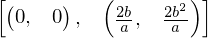

In [19]:
sols = solve([x - f(x,y,a), y-g(x,y,b)],[x,y])
sols

Notice that the variable `sols` contains the fixed points.  For example, calling `sols[0]` returns the first fixed point calculated. 

*Note: python indexes starting at zero.  Thus, the first entry in an array is indexed by 0.*

In [42]:
sols[0]

Now that we know what the solutions are, we can define the Jacobian which is given by 

$$J = \begin{pmatrix}f_x & f_y\\g_x & g_y\end{pmatrix}_{(x^*,y^*)}$$

Notice that by adding `.subs(x,sols[0][0])` and `.subs(y,sols[0][1])` at the end of our matix, we are simply plugging in the $x$ and $y$ components of `sols[0]`.

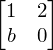

In [45]:
J = Matrix([[diff(f(x,y,a),x), diff(f(x,y,a),y)],[diff(g(x,y,b),x), diff(g(x,y,b),y)]]).subs(x,sols[0][0]).subs(y,sols[0][1])
J

Finally, we can determine the eigenvalues associated with the Jacobian by calling `J.eigenvals()`.  The `:1` after each eigenvalue is telling you the multipliciy of that particular eigenvalue.

In [46]:
J.eigenvals()